<figure> 
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Minicurso  de Inteligencia Artificial<center></span>

## <span style="color:Green"><center>Programación Orientada a objetos y Pytorch<center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
2. Daniel  Montenegro, Msc, dextronomo@gmail.com 
1. Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Clases](#Clases)

## <span style="color:blue">Enlaces importantes</span>

1. [Repositorio del mini curso](https://github.com/AprendizajeProfundo/Curso-Basico-IA)
1. [Repositorio Aprendizaje Profundo](https://github.com/AprendizajeProfundo)
1. [Clases en vivo](https://us02web.zoom.us/j/86057731334?pwd=MlgvU1cwZmtXbnBBSjVodmNaTDFLQT09), Meeting ID: 860 5773 1334, Passcode: 392083
1. [Clases grabadas](https://aprendizajeprofundo.co/cursoslibres/)


## <span style="color:blue">Introducción</span> 

Python es un lenguaje de programación orientado a objetos. **Todo** en Python es un objeto, con sus propiedades y métodos.

En esta sesión crearemos una red neuronal, usando `el pradigma programación orientado a objetos`, y crearemos un entrenador para entrenar la red de tal manera  que prediga el tipo de prenda del conjunto de datos mnist-fashion.

El conjunto de datos mnist-fashion, puede cargarse directamente del conjunto  de ejemplos de [Pytorch](https://pytorch.org/). En realidad este conjunto de datos muy famoso en el área de la inteligenica artificial moderna puede descergarse de varios sitios. Por facilidad en esta lección lo descargamos directamente de Pytorch.

## <span style="color:blue">Clases e instancias de clase (objetos)</span> 

En la programación orientada a objetos se diseñan piezas de código que llamamos objetos que interaxtuan entre si.
Para empezar, debemos difereciar entre clase e instancia de clase.

Por clase se entiende el plano o plantilla de los objetos. LAs instancia de clase son son objetos propiamente dichos. Esto significa que se diseña e implementa una clase y se instancian objetos de esa clase.

Las dos imágenes siguientes tomadas de Wipkipedia ilustra la deirecnia entre clase (plano) e instancias de clase (los objetos). 

**Idealización de un clase**

<figure> 
<img src="../Imagenes/plano_circuito_Musical_Organ.jpeg"  width="400" height="400" align="center"/> 
</figure>

El diagrama de circuito del chip de sonido Texas Instruments SN76477. Fuente [Wikipedia](https://en.wikipedia.org/wiki/Texas_Instruments_SN76477)

**Instancias de clase: objetos**

<figure> 
<img src="../Imagenes/chipTesasIntruments.jpg"  width="400" height="400" align="left"/> 
</figure>
<figure> 
<img src="../Imagenes/chipTesasIntruments.jpg"  width="400" height="400" align="right"/> 
</figure>


Chip de sonido Texas Instruments SN76477. Fuente [Wikipedia](https://es.wikipedia.org/wiki/Dise%C3%B1o_de_circuitos#/media/Archivo:76477_Musical_Organ.JPG)

## <span style="color:blue">Instalar Pytorch </span> 

En consola ejecute el siguiente comando. 

In [ ]:
#conda install -c pytorch pytorch

## <span style="color:blue">Trabajando con datos</span>

PyTorch tiene dos primitivas para trabajar con datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset`. *Dataset* almacena las muestras y sus etiquetas correspondientes, y *DataLoader* envuelve un iterable alrededor de *Dataset*.

In [8]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

import matplotlib.pyplot as plt
import numpy as np

from torch.nn import Flatten, Sequential, Linear, ReLU

PyTorch ofrece bibliotecas específicas de dominio como `TorchText`, `TorchVision` y `TorchAudio`, todas las cuales incluyen conjuntos de datos. Para este tutorial, usaremos un conjunto de datos de `TorchVision`.

El módulo `torchvision.datasets` contiene objetos de conjunto de datos para muchos datos de visión del mundo real como CIFAR, COCO ([lista completa aquí](https://pytorch.org/vision/stable/datasets.html)). En este tutorial, usamos el conjunto de datos FashionMNIST. Cada conjunto de datos de TorchVision incluye dos argumentos: *transform* y *target_transform* para modificar las muestras y las etiquetas respectivamente.

En el siguiente fragmento de código se leen los datos para entrenamiento y test. Si aún no se han bajao los datos, Pytorch lo hace por esta única ocasión. La próxima vez los leerá de la carpeta interna 'data'. El parámetro *transform* permite conviertir los datos a un formato específico. En este caso a tensores de Torch.

In [ ]:
# Baja los datos de entrenamiento de open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Baja los datos test data de open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Pasamos el *Dataset* como un parámetro para `DataLoader`
Esto envuelve un iterable sobre nuestro conjunto de datos y admite procesamiento por lotes, muestreo, barajado y carga de datos multiproceso automáticos. Aquí definimos un tamaño de lote de 64, es decir, cada elemento en el cargador de datos iterable devolverá un lote de 64 imágenes con sus etiquetas.

### Una primera imagen de los datos

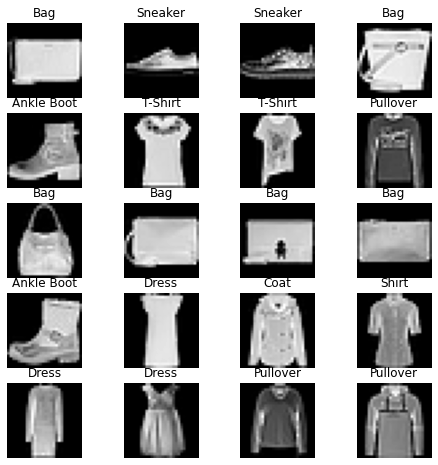

In [10]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(training_data));
    img = training_data[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[training_data[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [13]:
batch_size = 64

#crea data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print('X[N, C, H, W]: ', X.shape)
    print('Shape of y: ', y.shape, y.dtype)
    break

X[N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


## <span style="color:blue">Creando Clases</span>

Podemos imaginarnos **una clase** como una plantilla o un plano para construir objetos.

Para crear una clase, usa el la palabra clave```class:```

Supongamos, por ejemplo, que queremos crear una plataforma para recolectar toda la información personal que podamos de nuestros usuarios (nada parecido con la realidad) porque... sí.

Creemos una clase que no haga nada.

In [14]:
class NeuralNetwork:
    pass

### Clases e instancias de clase

Las clase son planos o plantillas para la cosntrucción de los objetos. Solamente hay un plano para una clase. Las instancias de clase son los objetos creados usando las clases. En el siguiente ejemplo creamos dos instancias de la clase `NeuralNetwork`.

In [15]:
modelo_1 = NeuralNetwork()
modelo_2 = NeuralNetwork()
print(modelo_1)

### Herencia

Es posible derivar una clase de otra, para disponer de todo el contenido de lace base. Este proceso se conice como subclassing y la técnica como herencia. 

En el siguiente fragmento derivamos la clase `NeuralNetwork` de la clase base `nn.Module`, la cual contiene toda la infraestructura básica pra implementar una red neuronal. Esto permite concentrarse en el modleos y no en los detalles de implementación básica.

In [16]:
class NeuralNetwork(nn.Module):
    pass

### Métodos y propiedades

Una clase útil debe tener datos sobre los cuales trabaja. Estos se denominan `propiedades`. Los `métodos` son la funciones internas de la clase que hacen tareas específicas.

##   <span style="color:blue">Constructor \_\_init\_\_()</span> 

Una función dentro de una clase de llama **método**. \_\_init\_\_ es el abreviado de **initialization** (inicialización). También se le conoce como el **constructor**.

**Note los dos guiones bajos antes y despues de init**.

## <span style="color:blue">Creando una red neuronal</span>

Para definir una red neuronal en PyTorch, creamos una clase que hereda de nn.Module. Definimos las capas de la red en la función __init__ y especificamos cómo pasarán los datos a través de la red en la función de reenvío. Para acelerar las operaciones en la red neuronal, lo trasladamos a la GPU si está disponible.

In [1]:
import torch
from torch import nn
from torch.nn import Flatten, Sequential, Linear, ReLU

# define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        #llama al cosntructor de la clase base
        super(NeuralNetwork, self).__init__()
        # define las capas que usará en la construcción del modelo
        self.flatten = Flatten()
        self.linear_relu_stack = Sequential(
            Linear(28*28, 512),
            ReLU(),
            Linear(512, 512),
            ReLU(),
            Linear(512, 10),
            ReLU()
        )
        
    # El método forward es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntase libre de usar más
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# instancia un objeto
model = NeuralNetwork().to(device)
print(model)

NameError: name 'device' is not defined

### Nota

Cuando se invoca model, automáticamente se ejecuta la función *\_\_call\_\_* de la clase. En Pytorch la clase `nn.Module` de la cual derivamos  nuestra clase llama internamente a la función *forward*, que nosotros debemos sobrecargar (escribir para definir nuestro modelo), como puede verificar [aquí](https://github.com/pytorch/pytorch/blob/472be69a736c0b2aece4883be9f8b18e2f3dfbbd/torch/nn/modules/module.py#L487).

1. Una Inteligencia Artificial es un objeto de software que es capaz de
    + Recibir entrenamiento
    + Recibir y transformar señales sensoriales de un ambiente (entrada sensorial)
    + Procesar las entrada recibidas y entregar una respuesta discreta o continua, multidimenisional (cerebro)
    + Tomar decisiones con base en las respuestas recibidas

## <span style="color:blue">Entrenamiento de una red neuronal</span>


<figure> 
<img src="../Imagenes/trainer.png"  width="800" height="800" align="center"/> 
</figure>

Entrenamiento de una red nuronal. Modelo de objetos. Fuente Alvaro Montenegro

### Clase NeuralNetwork

In [ ]:
Esta clase define el modelo de red neuronal

In [2]:
from torch import nn
from torch.nn import Flatten, Sequential, Linear, ReLU

class NeuralNetwork(nn.Module):
    def __init__(self):
        
        # llama constructor de la clase base
        super(NeuralNetwork, self).__init__()
        
        # define capas de la red
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

print(NeuralNetwork())

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


### Clase Trainer

Esta clase es diseñada para controlar el proceso de entrneamiento. Antes de crear un objeto de tipo datset, asegurese de tener disponible los siguiente objetos

1. Un modelo.
1. Un optimizador configurado para el modelo
1. Una función de pérdida adecuada para el modelo

Opcionalmente puede de un objeto SummaryWriter de Tensorboard y el path para lamacena los modelos.

Para ejecutar el método `fit` se requiere disponder de los objetos de datos para entenamiento y validación. 

In [3]:
from datetime import datetime

class Trainer:
    def __init__(self, model, loss_fn, optimizer, metrics=None,
                 writer=None, path_to_save='',
                 learning_rate = 1e-3,
                 batch_size = 64,
                 epochs = 5, n_report= 1000):
        #################################
        # propiedades de la clase Trainer
        #################################
        # red neuronal
        self.model = model
        # función de pérdida
        self.loss_fn = loss_fn
        # optimizador
        self.optimizer = optimizer
        # métricas
        self.metrics = metrics
        
        # writer de tensorboard 
        self.writer = writer
        
        # hiperparámetros
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.n_report = n_report
        
        # path para almacenar los modelos
        self.path_to_save = path_to_save
        # path al mejor modelo encontrado
        self.best_model = None
        
        # datos: se cargan desde la función fit
        # datos de entrenamiento
        self.training_loader = None
        # datos de validación
        self.validation_loader = None
     
    ##############################
    #  Métodos de la clase Trainer
    ##############################
    # setters              
    def set_model(self, model):
        self.model = model
    
    def set_loss(self, loss):
        self.loss = loss
        
    def set_optimizer(self, optimizer):
        self.optimizer = optimizer
        
    def set_writer(self, writer):
        self.writer =  writer
    # getters
    def get_model(self):
        return self.model
    
    
    def set_hiperparameters(self,
                 learning_rate = 1e-3,
                 batch_size = 64,
                 epochs = 5):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs        
    
    #####################################
    # métodos básicos para entrenamiento
    #####################################
    # paso de entrenamiento
    def _train_one_epoch_(self, epoch_index):
        """
        corre un paso de entrenamiento
        :params
        :epoch_index: índice de la época
        :n_report: cada cuantas iteraciones reportar en pantalla
        """
        running_loss = 0.
        last_loss = 0.
        # Aquí, usamos enumerate(training_loader) en lugar de
        # iter(training_loader) para que podamos rastrear el lote
        # indexar y hacer algunos informes dentro de la época
        for i, data in enumerate(self.training_loader):
            # Cada instancia de datos contiene parejas  input + label 
            inputs, labels = data

            # backpropagation
            # por defecto el cálculo del gradiente es acumulativo
            # comienza colocando el gradiente en cero
            self.optimizer.zero_grad()

            # Hace la predicción para este lote (batch)
            outputs = self.model(inputs)

            # Calcula la pérdida y sus gradientes
            loss = self.loss_fn(outputs, labels)
            loss.backward()

            # Ajusta los pesos del modelo 
            # w{i+1} = w{i} + learning_rate * grad(loss)
            self.optimizer.step()

            # Recolecta  datos y los reporta
            running_loss += loss.item()
            if i % self.n_report == (self.n_report-1):
                last_loss = running_loss / self.n_report # pérdida promedio por lote(batch)
                print('Pérdida en el lote {} : {}'.format(i + 1, last_loss))
                if self.writer is not None:
                    tb_x = epoch_index * len(training_loader) + i + 1
                    self.writer.add_scalar('Pérdida/Entrenamiento', last_loss, tb_x)
                running_loss = 0.

        return last_loss              
    
    def _validation_step_(self, validation=True):
        """
        corre un paso de validación
        :params: validation=True; toma los datos de validación
        :        sino toda los datos de entrenamiento
        """
        
        if validation:
            data_loader = self.validation_loader
        else:
            data_loader = self.training_loader
            
        running_vloss = 0.0   
        for i, vdata in enumerate(data_loader):
            vinputs, vlabels = vdata
            voutputs = self.model(vinputs)
            vloss = self.loss_fn(voutputs, vlabels)
            running_vloss += vloss

        avg_vloss = running_vloss / (i + 1)
        return avg_vloss
        
    
    # ciclo de entrenamiento
    def _train_loop_(self):
        # registra marca  de tiempo
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        # contador de epochs
        epoch_number = 0

        # Inicializa la mejor pérdida en un valor muy grande
        # el propósito es mejorar esta mejor pérdida
        best_vloss = 1_000_000.
        
        # ciclo de entrenamiento
        for epoch in range(self.epochs):
            print('epoch {}:'.format(epoch_number + 1))
            
            # paso de entrenamiento
            # coloca en modelo en modo entrenamiento 
            model.train(True)
            # lanza un paso de entrenamiento
            avg_loss = self._train_one_epoch_(epoch_number)

            # paso de validación 
            # coloca el modelo en modo inferencia
            self.model.train(False)
            # lanza un paso de validación
            avg_vloss = self._validation_step_()
            print('Pérdida entrenamiento: {}, validación {}'.format(avg_loss, avg_vloss))

            # Registra (log) la pérdida actual promedio  por lote (batch)
            # para entrenamiento y validación
            if self.writer is not None:
                self.writer.add_scalars('Pérdida entrenamiento v.s. Pérdida validación',
                                { 'Entrenamiento' : avg_loss, 'Validación' : avg_vloss },
                                epoch_number + 1)
                self.writer.flush()

            # Realice un seguimiento del mejor rendimiento y guarda el estado del modelo
            if avg_vloss < best_vloss:
                best_vloss = avg_vloss
                model_path = self.path_to_save + 'model_{}_{}'.format(timestamp, epoch_number)
                torch.save(model.state_dict(), model_path)
                self.path_best_model = model_path

            epoch_number += 1       
        # pérdida final
        avg_vloss = self._validation_step_(validation=False)
        print('Pérdida final: entrenamiento: {}, validación: {}'.format(avg_loss, avg_vloss))
            
    def fit(self, train_data, val_data, epochs=None, writer=None, best_loss=True):
        if writer is not None:
            self.writer = writer
        if epochs is not None:
            self.epochs = epochs
       # datos de entrenamiento
        self.training_loader = train_data
        # datos de validación
        self.validation_loader = val_data
        
        # lanza loop de entrenamiento
        self._train_loop_()
        # carga al modelo los pesos con mejor pérdida
        if best_loss:
            self.model.load_state_dict(torch.load(self.path_best_model))
        

### Clase Data

Clase contenedora de datos

In [4]:
from torch.utils.data import DataLoader

class Data():
    """
    Esta clase recibe un dataset, y lo envuelve en un dataloader
    
    :
    se definen getter y setter para la propiedad data
    """
    def __init__(self, dataset=None, batch_size=64, shuffle=True):
        """
        :params: dataset: opcional dataset incial inicial
        :batch_size: tamaño de los lotes de datos para el Dataloader
        :shuffle: True= mezclar los datos aleatoriamente (para entranamiento)
        """     
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self._data = DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)
    
    # getter
    def get_data(self):
        return self._data
    
    # setter
    def set_data(self, dataset):
        self._dataset = dataset
        self._data = DataLoader(self._dataset, batch_size=self.batch_size, shuffle=self.shuffle)
    
    # crea la propiedad data
    data = property(get_data, set_data)
    
    def __len__(self):
        return len(self._data)
    

### Crea los objetos para el entrenamiento

Esta parte depende de los datos del problema. Para crear dataset personalizado consulte [aquí](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [5]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Lambda, Compose
from torch import nn
from torch.nn import Flatten, Sequential, Linear, ReLU


import matplotlib.pyplot as plt
import numpy as np

from torch.utils.tensorboard import SummaryWriter

from datetime import datetime


# Prepara los datos
## Transformaciones para los datos

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

# Sube los datos a objetos Data, que son
# contenedores del dataset y DataLoader

train = Data(train_data, batch_size=32)
validation = Data(test_data, batch_size=32, shuffle=False)

# Crea el modelo
# Obtiene gpu o cpu device para el entrenamiento
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('using {} device'.format(device))

model = NeuralNetwork().to(device)

# Optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Función de pérdida
loss_fn = torch.nn.CrossEntropyLoss()


# path para almacenar los pesos de los mejores modelos
path_to_save = '../Modelos/'

# Trainer
trainer = Trainer(model=model, loss_fn=loss_fn,  optimizer=optimizer, 
                  n_report=375, path_to_save= path_to_save )

using cpu device


### Entrenamiento

In [6]:
trainer.fit(train.data, validation.data)


epoch 1:
  lote 375 pérdida: 1.5650345258712768
  lote 750 pérdida: 1.3296704686482748
  lote 1125 pérdida: 1.3061026088396708
  lote 1500 pérdida: 1.2848965770403544
  lote 1875 pérdida: 1.2848420422871907
Pérdida entrenamiento: 1.2848420422871907, validación 1.2742780447006226
epoch 2:
  lote 375 pérdida: 1.2352751949628193
  lote 750 pérdida: 1.2484349133173624
  lote 1125 pérdida: 1.2521797025998433
  lote 1500 pérdida: 1.254128612836202
  lote 1875 pérdida: 1.2138386880556742
Pérdida entrenamiento: 1.2138386880556742, validación 1.2749861478805542
epoch 3:
  lote 375 pérdida: 1.202307997862498
  lote 750 pérdida: 1.1989365599950155
  lote 1125 pérdida: 1.2195402541160583
  lote 1500 pérdida: 1.204964243253072
  lote 1875 pérdida: 1.21323202641805
Pérdida entrenamiento: 1.21323202641805, validación 1.246032953262329
epoch 4:
  lote 375 pérdida: 1.1861281224886577
  lote 750 pérdida: 1.2026419434547424
  lote 1125 pérdida: 1.1690270555814106
  lote 1500 pérdida: 1.1977787456512452
 

In [14]:
6000/32

187.5